In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 1 mT with a rate of 0.0008 mT/s (1200 s). Then, we are analyzing the output data of Script-4.0.
    
    I will also analyze the particles' histogram, to check if particles are located on the hill.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-4.0"

In [3]:
slope = 50/1200
slope

0.041666666666666664

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_50mT-1200s_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_50mT-1200s_l10_exp15.dat
ACI_CairoLattice_50mT-1200s_l10_exp19.dat
ACI_CairoLattice_50mT-1200s_l10_exp17.dat
ACI_CairoLattice_50mT-1200s_l10_exp18.dat
ACI_CairoLattice_50mT-1200s_l10_exp8.dat
ACI_CairoLattice_50mT-1200s_l10_exp16.dat
ACI_CairoLattice_50mT-1200s_l10_exp0.dat
ACI_CairoLattice_50mT-1200s_l10_exp5.dat
ACI_CairoLattice_50mT-1200s_l10_exp3.dat
ACI_CairoLattice_50mT-1200s_l10_exp6.dat
ACI_CairoLattice_50mT-1200s_l10_exp11.dat
ACI_CairoLattice_50mT-1200s_l10_exp1.dat
ACI_CairoLattice_50mT-1200s_l10_exp12.dat
ACI_CairoLattice_50mT-1200s_l10_exp9.dat
ACI_CairoLattice_50mT-1200s_l10_exp2.dat
ACI_CairoLattice_50mT-1200s_l10_exp10.dat
ACI_CairoLattice_50mT-1200s_l10_exp13.dat
ACI_CairoLattice_50mT-1200s_l10_exp7.dat
ACI_CairoLattice_50mT-1200s_l10_exp4.dat
ACI_CairoLattice_50mT-1200s_l10_exp14.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

    We remove the first shells of vertices

In [7]:
x_min = 95
y_min = -75

width = 700
hight = -700

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

95 795 -75 -775


In [8]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo_exp = Ca.loc[(Ca['y']>y_max) & (Ca['y']<y_min)]

In [9]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [26]:
Cairo_exp['field'] = (Cairo_exp.index.get_level_values('frame'))/100*slope

In [27]:
Cairo_exp

x           y  coordination  charge            dx  \
Exp frame  id                                                                 
0   0      25    301.104439 -301.304550             4      -2 -1.732051e+00   
           28    704.625685 -417.196014             3      -3  3.747952e-07   
           47    440.070723 -115.898809             4      -2 -1.732051e+00   
           48    347.420541 -115.904316             4       2 -1.732051e+00   
           49    324.265015 -102.505692             3       1  0.000000e+00   
...                     ...         ...           ...     ...           ...   
19  120000 1199  426.684724 -602.604004             3       1  1.000000e+00   
           1200  416.911987 -566.024860             3       1  1.732051e+00   
           1202  175.521088  -92.704002             3       1 -1.000000e+00   
           1203  195.066852  -92.704002             3      -1 -1.000000e+00   
           1205  787.500000 -731.857662             3      -1  1.732051e+00   

                       dy    type  field  mean  
Exp frame  id                                   
0   0      25   -1.000000  Q = -2    0.0     0  
           28    0.000000  Q = -3    0.0     0  
           47    1.000000  Q = -2    0.0     0  
           48    1.000000  Q = +2    0.0     0  
           49    2.000000  Q = +1    0.0     0  
...                   ...     ...    ...   ...  
19  120000 1199  1.732051  Q = +1   50.0     0  
           1200 -1.000000  Q = +1   50.0     0  
           1202 -1.732051  Q = +1   50.0     0  
           1203  1.732051  Q = -1   50.0     0  
           1205 -1.000000  Q = -1   50.0     0  

[1635920 rows x 9 columns]

In [28]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [29]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [30]:
a = increase.query('mean != 0')

In [31]:
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field type            
0   0.0   Q = +1  0.421286
          Q = +3  0.108647
          Q = -1  0.352550
          Q = -3  0.117517
          Q = +2  0.217778
...                    ...
19  50.0  Q = +2  0.324444
          Q = +4  0.035556
          Q = -2  0.244444
          Q = -4  0.017778
          Q = 0   0.377778

[21779 rows x 1 columns]

In [32]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [33]:
field = np.linspace(0,50,75)


vert_prop_evenspace_m = a.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [34]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [35]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red"]) 

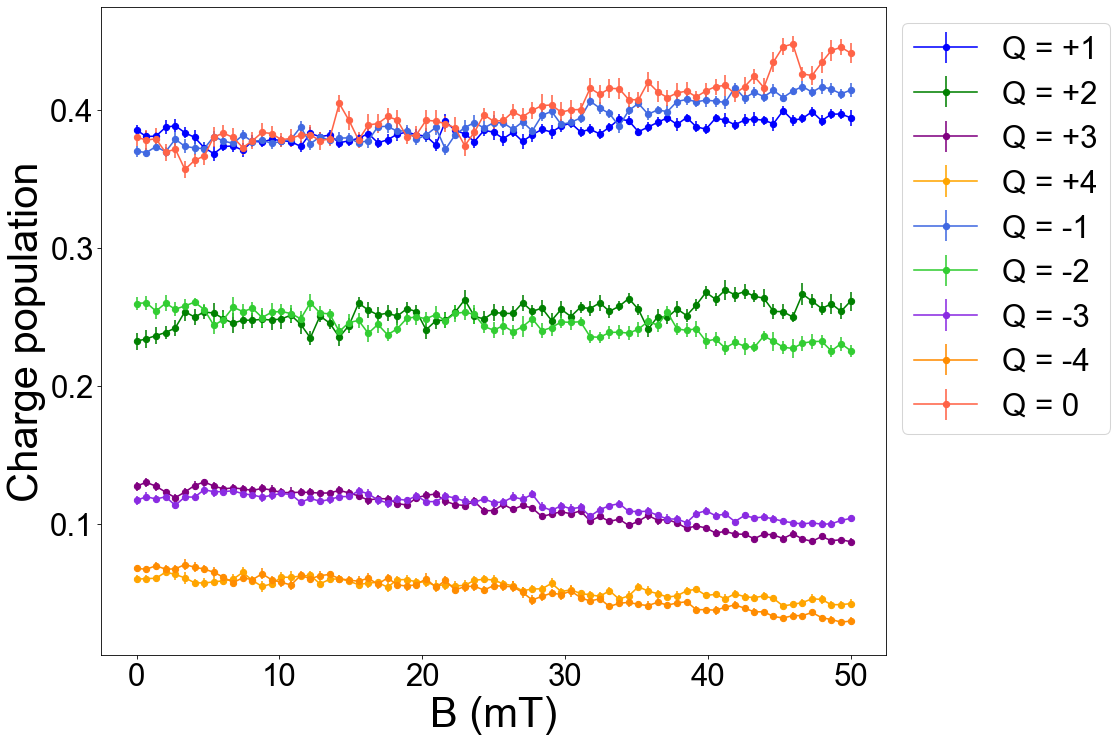

In [36]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m.groupby('type'):
    
    plt.errorbar(mtype.index.get_level_values("field"), mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()

## Particles' histogram

    It seems that we obtain a low quantity of flips whit this simulation parameters.
    I will observe also the particles position within the trap.

In [3]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                             "ACI_CairoLattice_50mT-1200s_l10_exp1.lammpstrj"),
                                                output = ["x","y","z","mux","muy","muz"])   

bnd = load_obj.get_bounds()
trj = load_obj.read_trj()
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])

In [24]:
col_trj

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2    0.000000    0.000000  0.0  4.52580  0.00000  0.0   
       1        2    0.000000   46.352001  0.0 -0.00000 -4.52580 -0.0   
       2        2   46.323502  -46.380402  0.0  4.52580  0.00000  0.0   
       3        2   46.323502   -0.028435  0.0  0.00000  4.52580  0.0   
       4        2   92.647102    0.000000  0.0 -4.52580 -0.00000 -0.0   
...           ...         ...         ...  ...      ...      ...  ...   
120000 1995     3  896.192993 -869.851013  0.0  5.00000  8.66025  0.0   
       1996     3  896.192993 -891.581970  0.0  5.00000 -8.66025  0.0   
       1997     3  915.633972 -864.669983  0.0  8.66025 -5.00000  0.0   
       1998     3  910.424988 -845.200989  0.0  5.00000  8.66025  0.0   
       1999     3  891.013000 -818.317993  0.0  8.66025  5.00000  0.0   

                   cx            cy   cz  
frame  id                                 
0      0     2.262900  0.000000e+00  0.0  
       1     0.000000 -2.262901e+00  0.0  
       2     2.262897 -1.136868e-13  0.0  
       3     0.000000  2.262895e+00  0.0  
       4    -2.262901  0.000000e+00  0.0  
...               ...           ...  ...  
120000 1995  1.176025  1.926025e+00  0.0  
       1996  0.690002 -1.291016e+00  0.0  
       1997  2.834045 -1.808044e+00  0.0  
       1998  1.544006  2.575989e+00  0.0  
       1999  2.588013  1.550964e+00  0.0  

[2402000 rows x 10 columns]

(-100, -300)

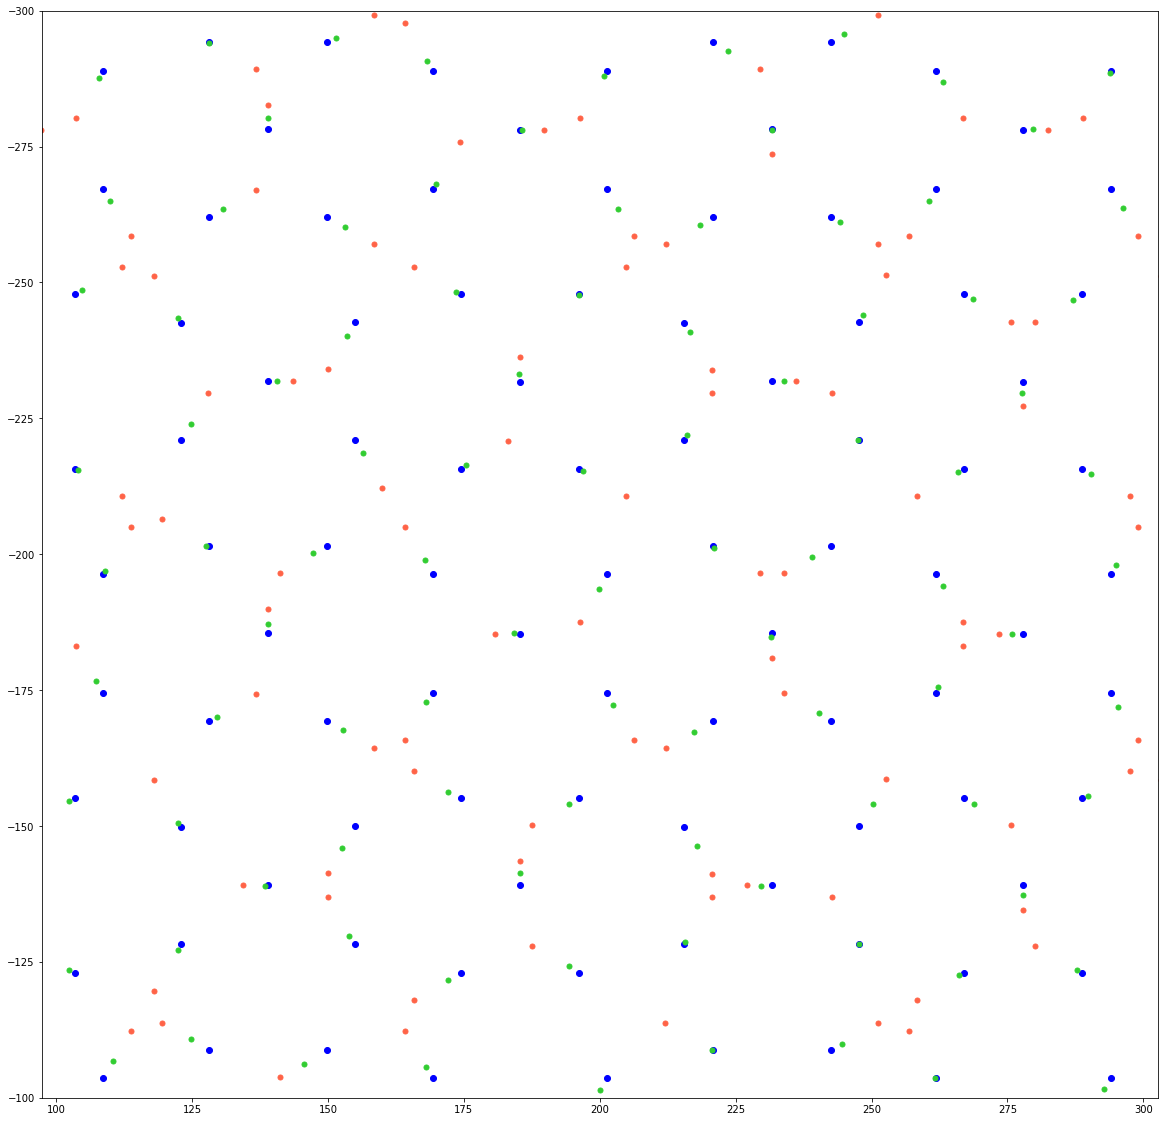

In [25]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 120000
# centers
plt.plot(col_trj.loc[frame].x,col_trj.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(col_trj.loc[frame].x+col_trj.loc[frame].cx,
         col_trj.loc[frame].y+col_trj.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(col_trj.loc[frame].x+col_trj.loc[frame].dx,
         col_trj.loc[frame].y+col_trj.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [26]:
type2 = col_trj.query('type == 2')
type3 = col_trj.query('type == 3')

(-100, -300)

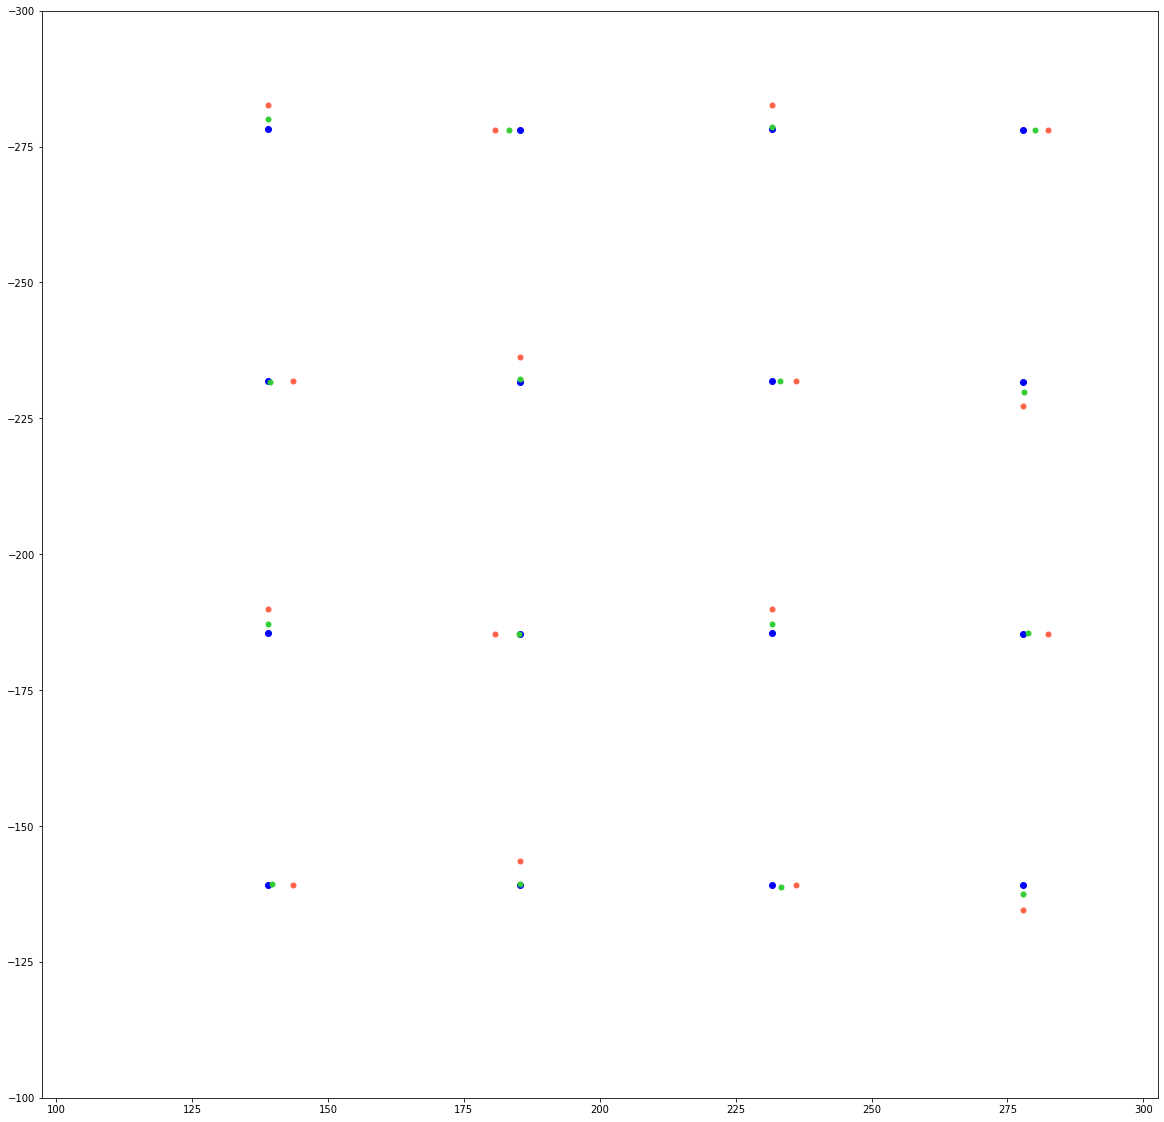

In [27]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 12000
# centers
plt.plot(type2.loc[frame].x,type2.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type2.loc[frame].x+type2.loc[frame].cx,
         type2.loc[frame].y+type2.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type2.loc[frame].x+type2.loc[frame].dx,
        type2.loc[frame].y+type2.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [28]:
type2_v = type2.query('dy == 0 or dy == -0')
type2_h = type2.query('dx == 0 or dx == -0')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f18ac950ad0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18ac950ad0>)

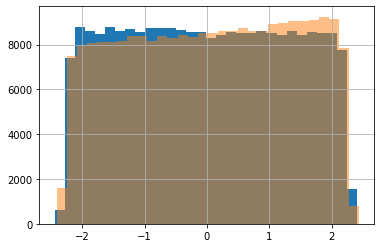

In [29]:
type2_v['cx'].hist(bins = 30), type2_h['cy'].hist(bins = 30, alpha = 0.5)

(-100, -300)

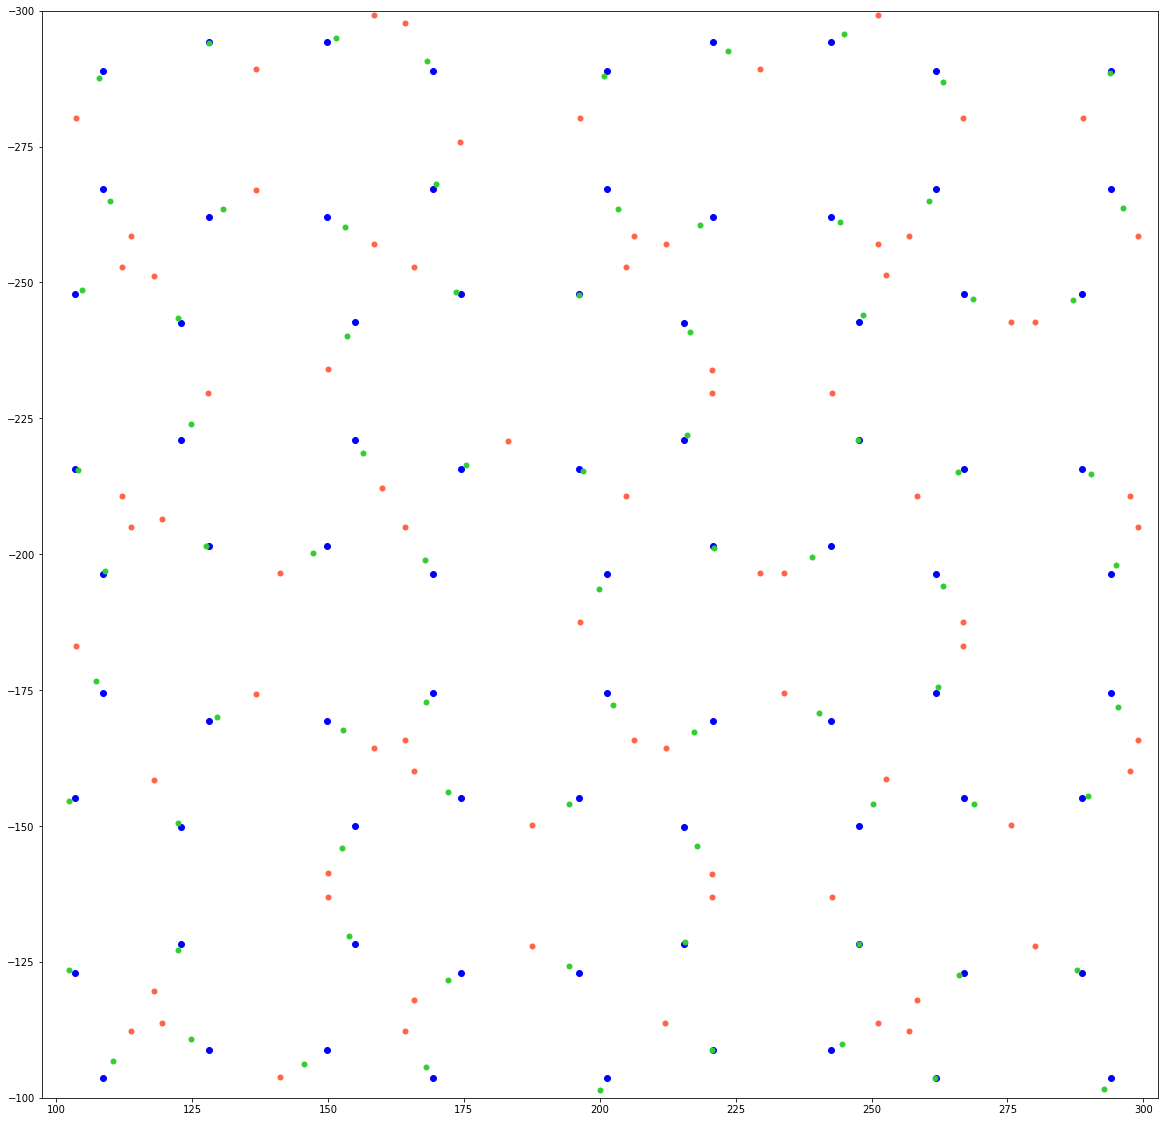

In [31]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 120000
# centers
plt.plot(type3.loc[frame].x,type3.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type3.loc[frame].x+type3.loc[frame].cx,
         type3.loc[frame].y+type3.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3.loc[frame].x+type3.loc[frame].dx,
         type3.loc[frame].y+type3.loc[frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

    Actually, in the cx column I have the projection of the particle position on the trap in the x and y axis, instead of having the relative position inside the trap.
   
    Then, to obtain the histogram of particles I need to undo this projection. To have the distance of the particles from the trap center.

In [32]:
type3

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      400      3  -16.046101   10.865500  0.0 -5.00000  8.66025  0.0   
       401      3  -10.865500   30.305901  0.0 -8.66025 -5.00000 -0.0   
       402      3   10.865500   30.305901  0.0 -8.66025  5.00000  0.0   
       403      3   16.046101   10.865500  0.0 -5.00000 -8.66025 -0.0   
       404      3   16.046101  -10.865500  0.0  5.00000 -8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
120000 1995     3  896.192993 -869.851013  0.0  5.00000  8.66025  0.0   
       1996     3  896.192993 -891.581970  0.0  5.00000 -8.66025  0.0   
       1997     3  915.633972 -864.669983  0.0  8.66025 -5.00000  0.0   
       1998     3  910.424988 -845.200989  0.0  5.00000  8.66025  0.0   
       1999     3  891.013000 -818.317993  0.0  8.66025  5.00000  0.0   

                   cx        cy   cz  
frame  id                             
0      400  -2.500000  4.330199  0.0  
       401  -4.330199 -2.500000  0.0  
       402  -4.330101  2.500000  0.0  
       403  -2.500001 -4.330101  0.0  
       404   2.500000 -4.330199  0.0  
...               ...       ...  ...  
120000 1995  1.176025  1.926025  0.0  
       1996  0.690002 -1.291016  0.0  
       1997  2.834045 -1.808044  0.0  
       1998  1.544006  2.575989  0.0  
       1999  2.588013  1.550964  0.0  

[1921600 rows x 10 columns]

In [33]:
type3_v = type3.query('dx == 5 or dx == -5')
type3_h = type3.query('dy == 5 or dy == -5')

(-100, -300)

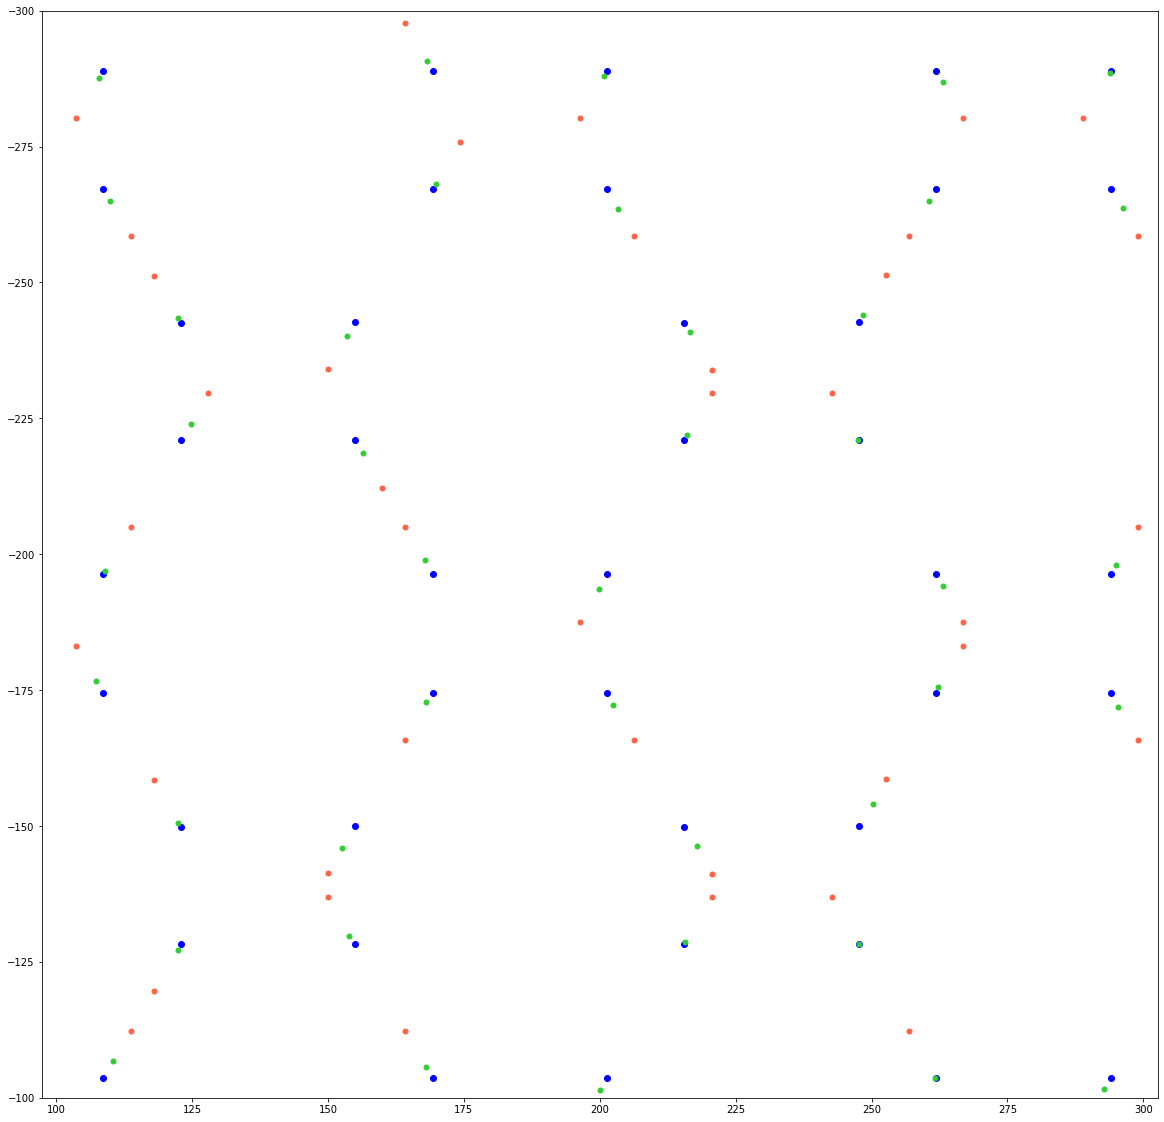

In [34]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 120000
# centers
plt.plot(type3_v.loc[frame].x,type3_v.loc[frame].y,'o', color ="blue")
# colloid position
plt.plot(type3_v.loc[frame].x+type3_v.loc[frame].cx,
         type3_v.loc[frame].y+type3_v.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_v.loc[frame].x+type3_v.loc[frame].dx,
         type3_v.loc[frame].y+type3_v.loc[frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)


In [35]:
type3_v

type           x           y    z   dx       dy   dz        cx  \
frame  id                                                                     
0      400      3  -16.046101   10.865500  0.0 -5.0  8.66025  0.0 -2.500000   
       403      3   16.046101   10.865500  0.0 -5.0 -8.66025 -0.0 -2.500001   
       404      3   16.046101  -10.865500  0.0  5.0 -8.66025  0.0  2.500000   
       406      3   30.277399   35.514900  0.0 -5.0 -8.66025 -0.0 -2.500000   
       408      3   30.277399  -35.514900  0.0 -5.0  8.66025  0.0 -2.500000   
...           ...         ...         ...  ...  ...      ...  ...       ...   
120000 1990     3  864.101013 -798.820984  0.0  5.0  8.66025  0.0  0.020996   
       1992     3  864.101013 -869.851013  0.0  5.0 -8.66025 -0.0  1.851013   
       1995     3  896.192993 -869.851013  0.0  5.0  8.66025  0.0  1.176025   
       1996     3  896.192993 -891.581970  0.0  5.0 -8.66025  0.0  0.690002   
       1998     3  910.424988 -845.200989  0.0  5.0  8.66025  0.0  1.544006   

                   cy   cz  
frame  id                   
0      400   4.330199  0.0  
       403  -4.330101  0.0  
       404  -4.330199  0.0  
       406  -4.330101  0.0  
       408   4.330101  0.0  
...               ...  ...  
120000 1990  0.151978  0.0  
       1992 -3.018005  0.0  
       1995  1.926025  0.0  
       1996 -1.291016  0.0  
       1998  2.575989  0.0  

[960800 rows x 10 columns]

In [36]:
type3_v['cy']= type3_v['cy']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
type3_v

type           x           y    z   dx       dy   dz        cx  \
frame  id                                                                     
0      400      3  -16.046101   10.865500  0.0 -5.0  8.66025  0.0 -2.500000   
       403      3   16.046101   10.865500  0.0 -5.0 -8.66025 -0.0 -2.500001   
       404      3   16.046101  -10.865500  0.0  5.0 -8.66025  0.0  2.500000   
       406      3   30.277399   35.514900  0.0 -5.0 -8.66025 -0.0 -2.500000   
       408      3   30.277399  -35.514900  0.0 -5.0  8.66025  0.0 -2.500000   
...           ...         ...         ...  ...  ...      ...  ...       ...   
120000 1990     3  864.101013 -798.820984  0.0  5.0  8.66025  0.0  0.020996   
       1992     3  864.101013 -869.851013  0.0  5.0 -8.66025 -0.0  1.851013   
       1995     3  896.192993 -869.851013  0.0  5.0  8.66025  0.0  1.176025   
       1996     3  896.192993 -891.581970  0.0  5.0 -8.66025  0.0  0.690002   
       1998     3  910.424988 -845.200989  0.0  5.0  8.66025  0.0  1.544006   

                   cy   cz  
frame  id                   
0      400   5.000083  0.0  
       403  -4.999969  0.0  
       404  -5.000083  0.0  
       406  -4.999970  0.0  
       408   4.999970  0.0  
...               ...  ...  
120000 1990  0.175489  0.0  
       1992 -3.484892  0.0  
       1995  2.223983  0.0  
       1996 -1.490736  0.0  
       1998  2.974496  0.0  

[960800 rows x 10 columns]

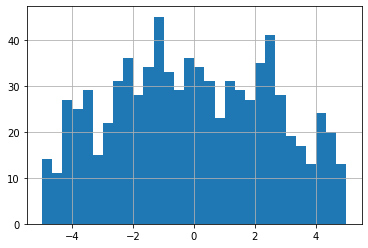

In [38]:
type3_v.loc[120000]['cy'].hist(bins = 30)

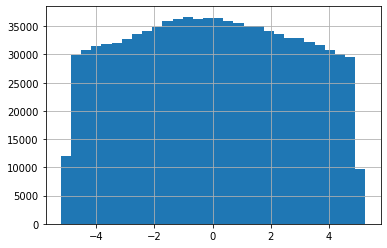

In [17]:
type3_v['cy'].hist(bins = 30)

(-100, -300)

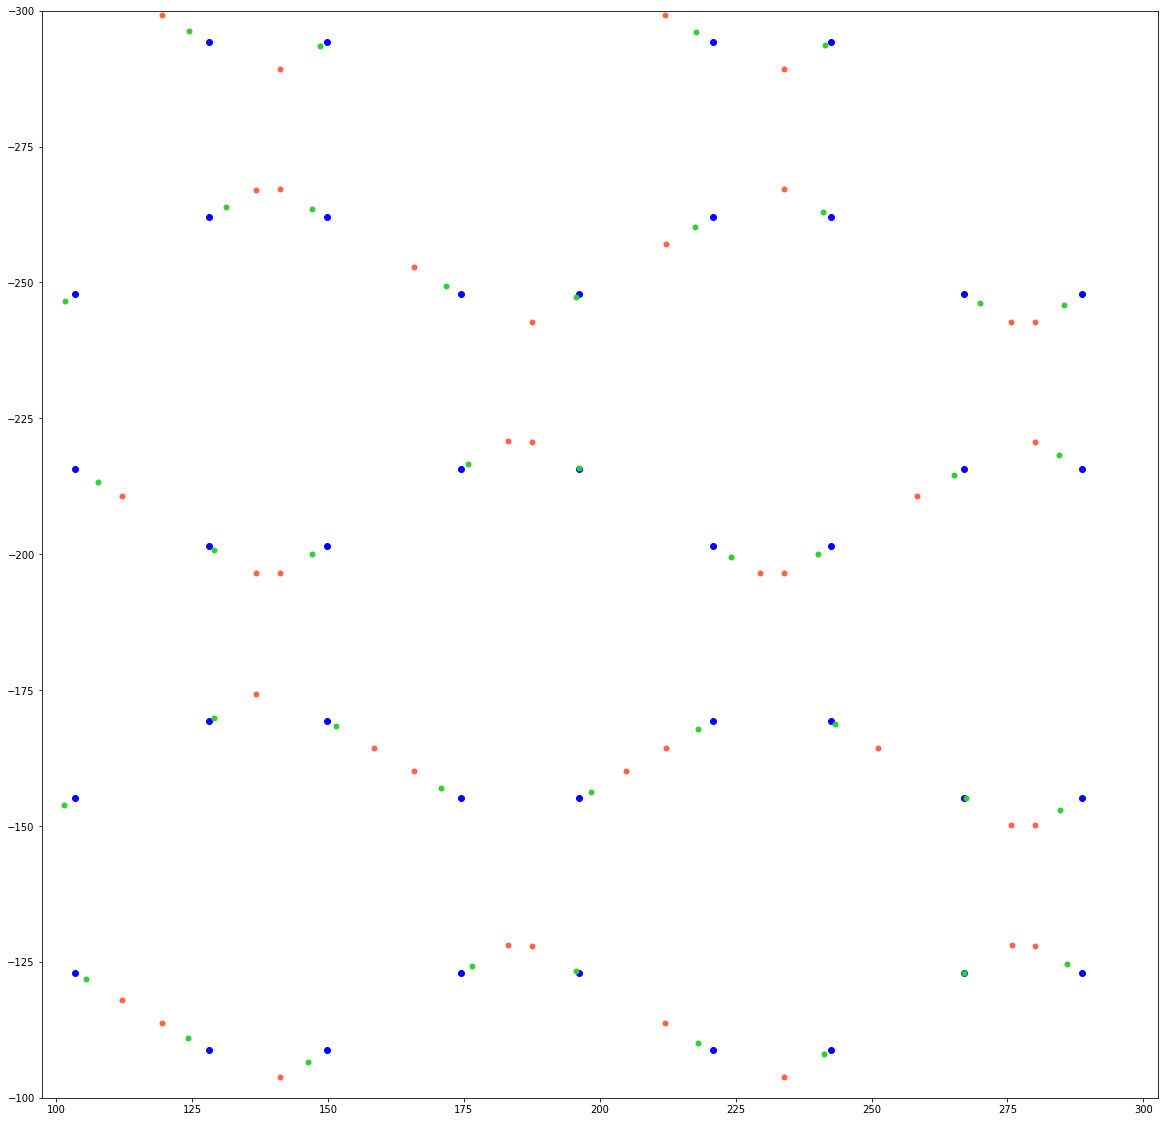

In [18]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

frame = 12000
# centers
plt.plot(type3_h.loc[frame].x,type3_h.loc[frame].y,'o', color ="blue")
# colloid positon
plt.plot(type3_h.loc[frame].x+type3_h.loc[frame].cx,
         type3_h.loc[frame].y+type3_h.loc[frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_h.loc[frame].x+type3_h.loc[frame].dx,
         type3_h.loc[frame].y+type3_h.loc[frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [19]:
type3_h

type           x           y    z       dx   dy   dz        cx  \
frame  id                                                                     
0      401      3  -10.865500   30.305901  0.0 -8.66025 -5.0 -0.0 -4.330199   
       402      3   10.865500   30.305901  0.0 -8.66025  5.0  0.0 -4.330101   
       405      3   35.486500   16.046101  0.0  8.66025 -5.0  0.0  4.330101   
       407      3   10.865500   62.398102  0.0 -8.66025 -5.0 -0.0 -4.330101   
       409      3   35.458000  -16.074499  0.0  8.66025  5.0  0.0  4.330101   
...           ...         ...         ...  ...      ...  ...  ...       ...   
120000 1991     3  844.689026 -771.937988  0.0 -8.66025 -5.0 -0.0 -3.805054   
       1993     3  869.281982 -850.409973  0.0 -8.66025 -5.0 -0.0 -1.881958   
       1994     3  891.013000 -850.409973  0.0 -8.66025  5.0  0.0 -2.317993   
       1997     3  915.633972 -864.669983  0.0  8.66025 -5.0  0.0  2.834045   
       1999     3  891.013000 -818.317993  0.0  8.66025  5.0  0.0  2.588013   

                   cy   cz  
frame  id                   
0      401  -2.500000  0.0  
       402   2.500000  0.0  
       405  -2.500001  0.0  
       407  -2.500000  0.0  
       409   2.499999  0.0  
...               ...  ...  
120000 1991 -2.315002  0.0  
       1993 -1.150024  0.0  
       1994  1.268982  0.0  
       1997 -1.808044  0.0  
       1999  1.550964  0.0  

[960800 rows x 10 columns]

In [20]:
type3_h['cx'] = type3_h['cx']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
type3_h

type           x           y    z       dx   dy   dz        cx  \
frame  id                                                                     
0      401      3  -10.865500   30.305901  0.0 -8.66025 -5.0 -0.0 -5.000083   
       402      3   10.865500   30.305901  0.0 -8.66025  5.0  0.0 -4.999969   
       405      3   35.486500   16.046101  0.0  8.66025 -5.0  0.0  4.999970   
       407      3   10.865500   62.398102  0.0 -8.66025 -5.0 -0.0 -4.999969   
       409      3   35.458000  -16.074499  0.0  8.66025  5.0  0.0  4.999970   
...           ...         ...         ...  ...      ...  ...  ...       ...   
120000 1991     3  844.689026 -771.937988  0.0 -8.66025 -5.0 -0.0 -4.393698   
       1993     3  869.281982 -850.409973  0.0 -8.66025 -5.0 -0.0 -2.173098   
       1994     3  891.013000 -850.409973  0.0 -8.66025  5.0  0.0 -2.676588   
       1997     3  915.633972 -864.669983  0.0  8.66025 -5.0  0.0  3.272474   
       1999     3  891.013000 -818.317993  0.0  8.66025  5.0  0.0  2.988380   

                   cy   cz  
frame  id                   
0      401  -2.500000  0.0  
       402   2.500000  0.0  
       405  -2.500001  0.0  
       407  -2.500000  0.0  
       409   2.499999  0.0  
...               ...  ...  
120000 1991 -2.315002  0.0  
       1993 -1.150024  0.0  
       1994  1.268982  0.0  
       1997 -1.808044  0.0  
       1999  1.550964  0.0  

[960800 rows x 10 columns]

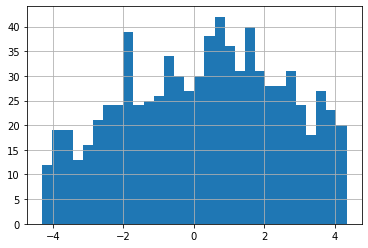

In [39]:
type3_h.loc[120000]['cx'].hist(bins = 30)

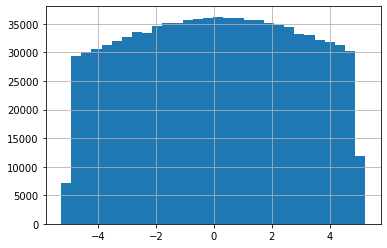

In [23]:
type3_h['cx'].hist(bins = 30)